In [1]:
import pandas as pd

df = pd.read_csv("global_inflation_countries.csv")  
df.head()


,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,inflation_rate
0,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1960,0.0
1,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1961,0.0
2,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1962,0.0
3,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1963,0.0
4,AFG,AFGANISTAN,ASIA MERIDIONAL,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1964,0.0


In [2]:
print(df.columns)

Index(['country_code', 'country_name', 'region', 'sub_region',
       'intermediate_region', 'indicator_code', 'indicator_name', 'year',
       'inflation_rate'],
      dtype='object')


In [3]:
df["country_name"].unique()

array(['AFGANISTAN', 'ALBANIA', 'ALEMANIA', 'ANDORRA', 'ANGOLA',
       'ANTIGUA Y BARBUDA', 'ARABIA SAUDITA', 'ARGELIA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIYAN',
       'BAHAMAS', 'BAHREIN', 'BANGLADESH', 'BARBADOS', 'BELARUS',
       'BELGICA', 'BELICE', 'BENIN', 'BERMUDAS', 'BHUTAN', 'BOLIVIA',
       'BOSNIA Y HERZEGOVINA', 'BOTSWANA', 'BRASIL', 'BRUNEI DARUSSALAM',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'CABO VERDE', 'CAMBOYA',
       'CAMERUN', 'CANADA', 'CHAD', 'CHILE', 'CHINA', 'CHIPRE',
       'COLOMBIA', 'COMORAS', 'CONGO, REPUBLICA DEL',
       'CONGO, REPUBLICA DEMOCRATICA DEL', 'COREA, REPUBLICA DE',
       'COREA, REPUBLICA POPULAR DEMOCRATICA DE', 'COSTA RICA',
       "COTE D'IVOIRE", 'CROACIA', 'CUBA', 'CURACAO', 'DINAMARCA',
       'DJIBOUTI', 'DOMINICA', 'ECUADOR', 'EGIPTO, REPUBLICA ARABE DE',
       'EL SALVADOR', 'EMIRATOS ARABES UNIDOS', 'ERITREA', 'ESLOVENIA',
       'ESPANA', 'ESTADOS UNIDOS', 'ESTONIA', 'ESWATINI', 'E

In [8]:
iran_inflation = df[df["country_name"] == "IRAN, REPUBLICA ISLAMICA DEL"]
iran_inflation.head()


,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,inflation_rate
5760,IRN,"IRAN, REPUBLICA ISLAMICA DEL",ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTO...,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1960,9.822411
5761,IRN,"IRAN, REPUBLICA ISLAMICA DEL",ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTO...,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1961,3.162564
5762,IRN,"IRAN, REPUBLICA ISLAMICA DEL",ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTO...,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1962,0.721321
5763,IRN,"IRAN, REPUBLICA ISLAMICA DEL",ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTO...,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1963,0.371850
5764,IRN,"IRAN, REPUBLICA ISLAMICA DEL",ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTO...,SOUTHERN ASIA,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1964,3.814490


In [80]:
df.dtypes

country_code            object
country_name            object
region                  object
sub_region              object
intermediate_region     object
indicator_code          object
indicator_name          object
year                     int64
inflation_rate         float64
dtype: object

In [81]:
print(df.isnull().sum())

country_code              0
country_name              0
region                 5440
sub_region                0
intermediate_region    8000
indicator_code            0
indicator_name            0
year                      0
inflation_rate            0
dtype: int64


In [82]:
# Fill missing values in 'region' column with the mode of the 'sub_region' column
df["region"] = df.groupby("sub_region")["region"].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)


In [83]:
print(df.isnull().sum())

country_code              0
country_name              0
region                 1728
sub_region                0
intermediate_region    8000
indicator_code            0
indicator_name            0
year                      0
inflation_rate            0
dtype: int64


In [84]:
missing_regions = df[df["region"].isnull()]["sub_region"].unique()
print("Sub-regions with missing regions:", missing_regions)


Sub-regions with missing regions: ['WESTERN EUROPE' 'AUSTRALIA AND NEW ZEALAND' 'NORTHERN AMERICA'
 'NORTHERN EUROPE']


In [85]:
sub_region_to_region = {
    "WESTERN EUROPE": "EUROPE",
    "AUSTRALIA AND NEW ZEALAND": "OCEANIA",
    "NORTHERN AMERICA": "AMERICAS",
    "NORTHERN EUROPE": "EUROPE"
}
df["region"] = df["region"].fillna(df["sub_region"].map(sub_region_to_region))


In [86]:
print(df.isnull().sum())

country_code              0
country_name              0
region                    0
sub_region                0
intermediate_region    8000
indicator_code            0
indicator_name            0
year                      0
inflation_rate            0
dtype: int64


In [87]:
print(f"Duplicate rows: {df.duplicated().sum()}")  # Count duplicate rows


Duplicate rows: 0


In [88]:

# Remove duplicates if any
df.drop_duplicates(inplace=True)


In [89]:
categorical_cols = [
    "country_code", "country_name", "region", "sub_region", 
     
]

df[categorical_cols] = df[categorical_cols].astype(str)  # Ensure all are strings

# Remove extra spaces and standardize case
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.title())
#Ensure all values are stored as strings
#Remove extra spaces
#Convert to Title Case (e.g., "afghanistan" → "Afghanistan")

In [90]:
df["country_name"] = df["country_name"].str.title().str.strip()  # Capitalize & remove spaces
df["region"] = df["region"].str.upper()  # Convert to uppercase for uniformity
df["sub_region"] = df["sub_region"].str.title().str.strip()  # Capitalize & remove spaces



In [91]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['inflation_rate'].quantile(0.25)
Q3 = df['inflation_rate'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['inflation_rate'] < lower_bound) | (df['inflation_rate'] > upper_bound)]

# Display the outliers
print("\nOutliers in the 'inflation_rate' column:")
outliers


Outliers in the 'inflation_rate' column:


,country_code,country_name,region,sub_region,intermediate_region,indicator_code,indicator_name,year,inflation_rate
48,Afg,Afganistan,ASIA MERIDIONAL,Southern Asia,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2008,26.418664
96,Alb,Albania,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Southern Europe,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1992,226.005421
97,Alb,Albania,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Southern Europe,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1993,85.004751
98,Alb,Albania,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Southern Europe,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1994,22.565053
101,Alb,Albania,EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS),Southern Europe,NaN,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",1997,33.180274
...,...,...,...,...,...,...,...,...,...
13693,Zmb,Zambia,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,EASTERN AFRICA,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2021,22.020768
13755,Zwe,Zimbabwe,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,EASTERN AFRICA,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2019,255.304991
13756,Zwe,Zimbabwe,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,EASTERN AFRICA,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2020,557.201817
13757,Zwe,Zimbabwe,ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRE...,Sub-Saharan Africa,EASTERN AFRICA,FP.CPI.TOTL.ZG,"INFLACION, PRECIOS AL CONSUMIDOR (% ANUAL)",2021,98.546105


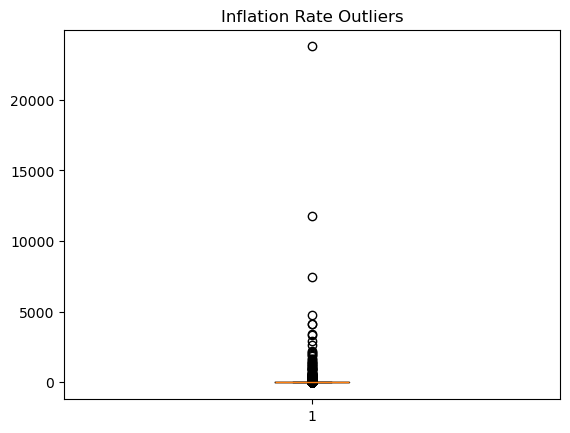

In [92]:
#to detect outliers in the 'inflation_rate' column
import matplotlib.pyplot as plt

plt.boxplot(df["inflation_rate"].dropna())  # Box plot to detect outliers
plt.title("Inflation Rate Outliers")
plt.show()


In [93]:
#Hypothesis1: 
#Inflation rates tend to increase or decrease in certain decades due to global economic events (e.g., oil crises in the 1970s, financial crises in 2008).

In [94]:
import matplotlib.pyplot as plt


# Create a new column for decades
df['decade'] = (df['year'] // 10) * 10

In [12]:
# Group by decade and calculate mean inflation rate
decade_avg = df.groupby('decade')['inflation_rate'].mean().reset_index()
decade_avg

KeyError: 'decade'

Text(0.5, 1.0, 'Global Inflation Trends by Decade')

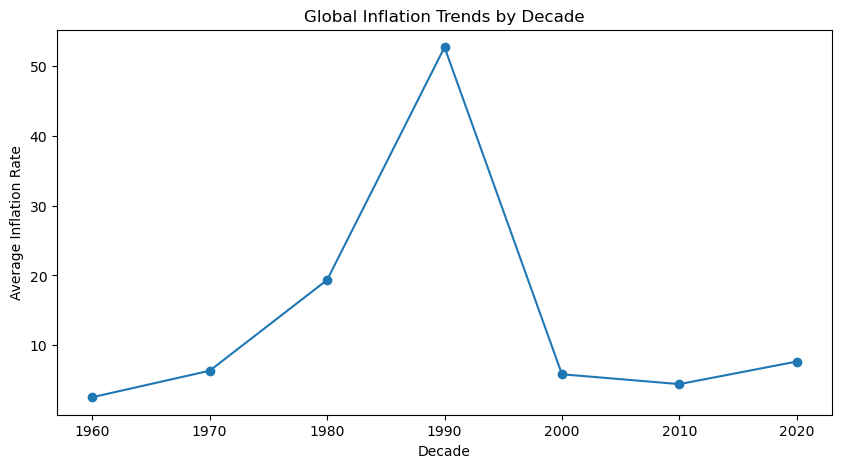

In [96]:

# Plot the trend
plt.figure(figsize=(10,5))
plt.plot(decade_avg['decade'], decade_avg['inflation_rate'], marker='o', linestyle='-')
plt.xlabel("Decade")
plt.ylabel("Average Inflation Rate")
plt.title("Global Inflation Trends by Decade")


In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose


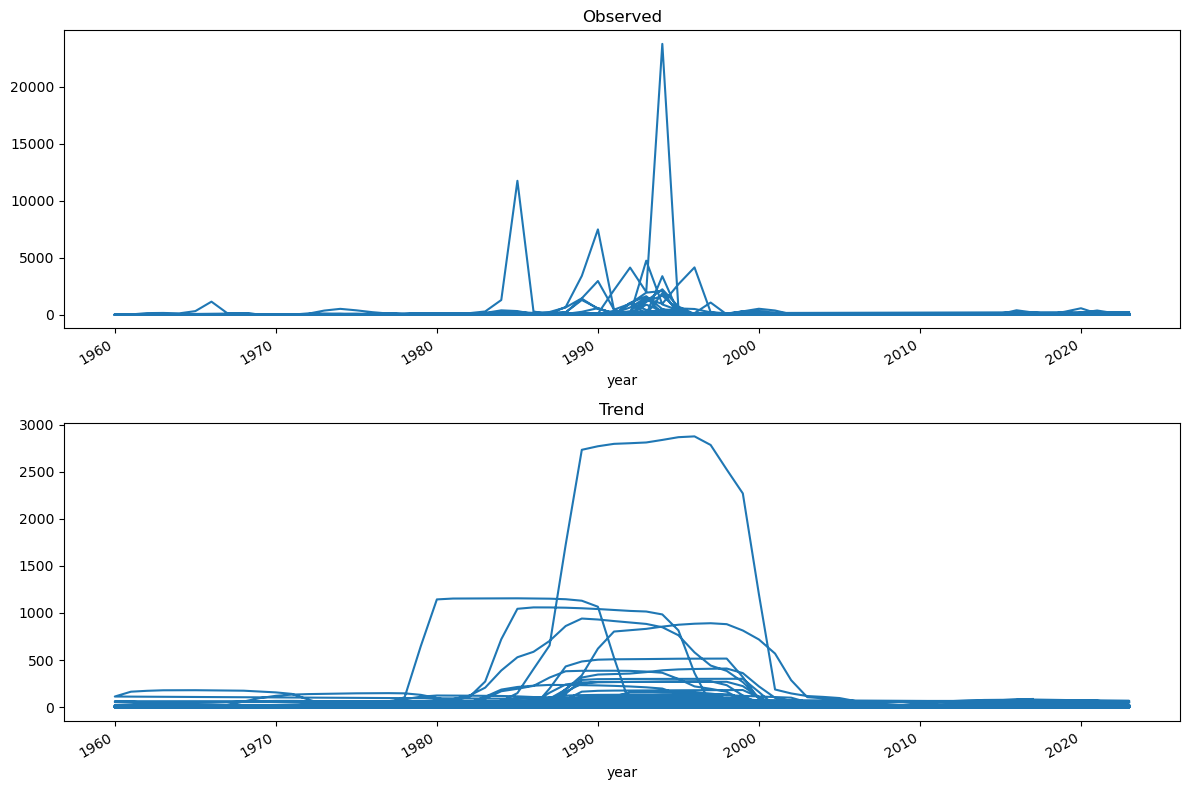

In [20]:
# Perform seasonal decomposition
result = seasonal_decompose(df['inflation_rate'], model='additive', period=12)

# Plot the decomposition (only observed and trend)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
result.observed.plot(ax=ax1)
ax1.set_title('Observed')
result.trend.plot(ax=ax2)
ax2.set_title('Trend')
plt.tight_layout()
plt.show()


In [21]:
# Dictionary to map Spanish region names to English
region_translation = {
    "ÁFRICA AL SUR DEL SAHARA (EXCLUIDO ALTOS INGRESOS)": "Sub-Saharan Africa",
    "AMÉRICA LATINA Y EL CARIBE (EXCLUIDO ALTOS INGRESOS)": "Latin America & Caribbean",
    "EUROPA Y ASIA CENTRAL (EXCLUIDO ALTOS INGRESOS)": "Europe & Central Asia",
    "ORIENTE MEDIO Y NORTE DE ÁFRICA (EXCLUIDO ALTOS INGRESOS)": "Middle East & North Africa ",
    "ASIA MERIDIONAL": "South Asia",
    "EUROPE": "Europe",
    "OCEANIA": "Oceania",
    "ASIA ORIENTAL Y EL PACÍFICO (EXCLUIDO ALTOS INGRESOS)": "East Asia & Pacific",
    "AMERICAS": "Americas"
}


df["region"] = df["region"].map(region_translation)


In [22]:
df["region"]

year
1960-01-01            South Asia
1961-01-01            South Asia
1962-01-01            South Asia
1963-01-01            South Asia
1964-01-01            South Asia
                     ...        
2019-01-01    Sub-Saharan Africa
2020-01-01    Sub-Saharan Africa
2021-01-01    Sub-Saharan Africa
2022-01-01    Sub-Saharan Africa
2023-01-01    Sub-Saharan Africa
Name: region, Length: 13760, dtype: object

In [23]:
#hypothsis3:
#Countries within the same region experience similar inflation trends due to shared economic policies.

# Calculate the average inflation rate for each region
region_avg = df.groupby('region')['inflation_rate'].mean().sort_values(ascending=False)
region_avg


region
Latin America & Caribbean      34.284575
Europe & Central Asia          26.597958
Sub-Saharan Africa             22.640286
Middle East & North Africa      8.340805
East Asia & Pacific             5.970658
South Asia                      5.609285
Name: inflation_rate, dtype: float64

In [102]:
# Group by region and year, then calculate mean and standard deviation of inflation
region_inflation = df.groupby(["region", "year"])["inflation_rate"].agg(["mean", "std"]).reset_index()

# Rename columns for clarity
region_inflation.rename(columns={"mean": "avg_inflation", "std": "inflation_variability"}, inplace=True)

# Display the results
region_inflation.sample(10)


,region,year,avg_inflation,inflation_variability
272,Latin America & Caribbean,1976-01-01,11.127889,33.203984
302,Latin America & Caribbean,2006-01-01,3.941755,3.920872
226,Europe & Central Asia,1994-01-01,339.403203,776.179107
149,Europe,1981-01-01,8.964513,11.455744
430,Oceania,2006-01-01,3.460345,0.134270
506,South Asia,2018-01-01,2.996681,2.037970
575,Sub-Saharan Africa,2023-01-01,8.745084,10.819263
155,Europe,1987-01-01,2.563397,4.292053
349,Middle East & North Africa,1989-01-01,6.467663,8.594863
115,East Asia & Pacific,2011-01-01,4.212749,4.042303


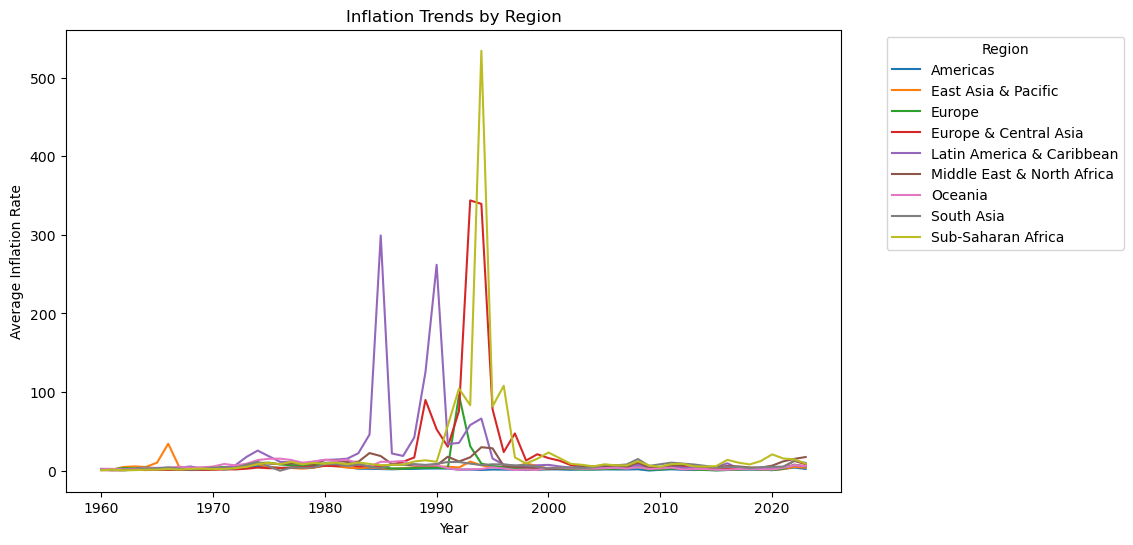

In [103]:

import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each region's inflation trend over time
sns.lineplot(data=region_inflation, x="year", y="avg_inflation", hue="region")

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Average Inflation Rate")
plt.title("Inflation Trends by Region")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [104]:
# Filter for Sub-Saharan Africa
sub_saharan_countries = df[df["region"] == "Sub-Saharan Africa"]["country_name"].unique()

# Display the list of countries
sub_saharan_countries

array(['Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Camerun', 'Chad', 'Comoras', 'Congo, Republica Del',
       'Congo, Republica Democratica Del', "Cote D'Ivoire", 'Eritrea',
       'Eswatini', 'Etiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
       'Guinea Ecuatorial', 'Guinea-Bissau', 'Kenya', 'Lesotho',
       'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauricio',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria',
       'Republica Centroafricana', 'Rwanda', 'Santo Tome Y Principe',
       'Senegal', 'Seychelles', 'Sierra Leona', 'Somalia', 'Sudafrica',
       'Sudan', 'Sudan Del Sur', 'Tanzania', 'Togo', 'Uganda', 'Zambia',
       'Zimbabwe'], dtype=object)

In [105]:
# Sort the DataFrame by inflation rate in descending order
top_inflation_countries = df.sort_values(by="inflation_rate", ascending=False).head(20)

# Display the top 20 countries with the highest inflation rates
top_inflation_countries[["country_name", "inflation_rate"]]

,country_name,inflation_rate
year,,
1994-01-01,"Congo, Republica Democratica Del",23773.131774
1985-01-01,Bolivia,11749.639632
1990-01-01,Peru,7481.663611
1993-01-01,Ucrania,4734.914347
1996-01-01,Angola,4145.105982
1992-01-01,"Congo, Republica Democratica Del",4129.169857
1989-01-01,Peru,3398.679010
1994-01-01,Armenia,3373.759443
1990-01-01,Brasil,2947.732772
